In [1]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt

train_set_x = pd.read_csv('../data/train_set_x_reduced.csv')
train_set_y = pd.read_csv('../data/train_set_y.csv')
test_set_x = pd.read_csv('../data/test_set_x_reduced.csv')
test_set_y = pd.read_csv('../data/test_set_y.csv')
pca_components = pd.read_csv('../data/pca_components.csv')


In [2]:
# Random search cross validation

from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start=0, stop=200, num=20)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = range(1, 21)
# Minimum number of samples required to split a node
min_samples_split = range(1, 11)
# Minimum number of samples required at each leaf node
min_samples_leaf = range(1, 6)
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}


RFC = RandomForestClassifier()
# Use the random grid to search for best hyperparameters
# Random search of parameters, using 10 fold cross validation,
# search across 100 different combinations, and use all available cores
RFC_random_CV = RandomizedSearchCV(estimator=RFC, param_distributions=random_grid,
                               n_iter=100, cv=10, verbose=2, random_state=42, n_jobs=-1)
# Fit the random search model
search = RFC_random_CV.fit(train_set_x, train_set_y)
print('Hyperparameter tuning:', search.best_params_)


Fitting 10 folds for each of 100 candidates, totalling 1000 fits


c:\Users\Rebirth\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"
c:\Users\Rebirth\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [0.01731781        nan        nan 0.01514202 0.0117349  0.0140061
 0.01410107 0.01078918 0.01277612 0.01296479 0.00974734        nan
 0.01239706 0.01485775 0.01542548 0.01315455 0.01192438 0.01343855
 0.01542584 0.0143848  0.01201908 0.01514148 0.01381626 0.01305967
 0.01485811 0.01287099 0.0151413  0.01249221 0.01580409        nan
 0.01305985 0.01419496        nan 0.01334358        nan 0.01410053
 0.01466898        nan        nan        nan 0.01466898 0.01126204
 0.01192384 0.01561559 0.01485739        nan 0.00775942        nan
 0.01485757        nan        nan        nan 0.01675106 0.0126807
 0.01419523 

Hyperparameter tuning: {'n_estimators': 115, 'min_samples_split': 3, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': 7, 'bootstrap': False}


In [3]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [False],
    'max_depth': range(5,10),
    'max_features': ['auto'],
    'min_samples_leaf': [1, 2, 3, 4, 5],
    'min_samples_split': [1, 2, 3, 4, 5],
    'n_estimators': [90, 95, 100, 105, 110, 115, 120, 125,130],
}
# Create a based model
rfc = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rfc, param_grid = param_grid, 
                          cv = 10, n_jobs = -1, verbose = 2)
grid_search.fit(train_set_x, train_set_y)
grid_search.best_params_


Fitting 10 folds for each of 1125 candidates, totalling 11250 fits


c:\Users\Rebirth\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"
c:\Users\Rebirth\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan        nan        nan ... 0.01608782 0.01514247 0.01618288]
  warnings.warn(
c:\Users\Rebirth\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:880: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


{'bootstrap': False,
 'max_depth': 6,
 'max_features': 'auto',
 'min_samples_leaf': 5,
 'min_samples_split': 2,
 'n_estimators': 125}

<ipython-input-8-49802b77e9b3>:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(train_set_x, train_set_y)


Feature importance: [(0.16566229743506275, '2'), (0.14157235334610027, '5'), (0.08468017728696688, '8'), (0.08181129471063454, '4'), (0.07275745349306795, '6'), (0.06983497720685435, '11'), (0.05854663638261028, '7'), (0.054510411104025505, '10'), (0.051724725929330015, '13'), (0.05108936697351622, '9'), (0.04625119192232925, '12'), (0.043675639339126486, '0'), (0.04077297759349196, '3'), (0.03711049727688375, '1')]


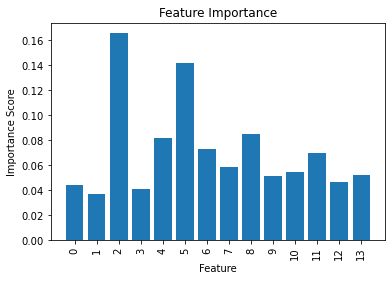

In [8]:
# get feature importance scores from the trained random forest
param = grid_search.best_params_

# train a random forest classifier with the specified parameters
rfc = RandomForestClassifier(bootstrap=False, max_depth=6, max_features='auto',
                             min_samples_leaf=5, min_samples_split=2, n_estimators=125)
rfc.fit(train_set_x, train_set_y)

importance_scores = rfc.feature_importances_
attributes = list(train_set_x.columns)

# sort feature importance scores in descending order and zip with attribute names
sorted_scores = sorted(zip(importance_scores, attributes), reverse=True)

# print feature importance scores
print('Feature importance:', sorted_scores)

# plot feature importance scores
fig = plt.figure()
plt.bar(range(len(attributes)), importance_scores)
plt.xticks(range(len(attributes)), attributes, rotation='vertical')
plt.xlabel('Feature')
plt.ylabel('Importance Score')
plt.title('Feature Importance')
plt.show()


AttributeError: 'Rectangle' object has no property 'ylabel'

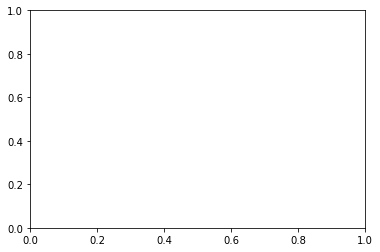

In [11]:
#pca 5 is the most important
pca = pca_components.iloc[5]
pca.abs().sort_values(ascending=False).plot(kind='bar', ylabel='Eigenvalue',
                                            xlabel='Attribute', title='Attribute Importance for Principal Component')


In [10]:
#performance evaluation
from sklearn.metrics import mean_absolute_error, mean_squared_error
linear_ridge_train_y_predicted = rfc.predict(train_set_x)
print('Train set MAE:', mean_absolute_error(
    linear_ridge_train_y_predicted, train_set_y))
print('Train set MSE:', mean_squared_error(
    linear_ridge_train_y_predicted, train_set_y))
linear_ridge_test_y_predicted = rfc.predict(test_set_x)
print('Test set MAE:', mean_absolute_error(
    linear_ridge_test_y_predicted, test_set_y))
print('Test set MSE:', mean_squared_error(
    linear_ridge_test_y_predicted, test_set_y))



Train set MAE: 249682.78745149996
Train set MSE: 187104557225.24625
Test set MAE: 275056.7827403482
Test set MSE: 199444477411.66693
